In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from matplotlib.ticker import PercentFormatter

In [ ]:
meta = pd.read_excel('/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_Meta_Ads.xlsx', sheet_name='Meta Ads')


In [ ]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Dia                          1205 non-null   datetime64[ns]
 1   Tipo de Campanha             1205 non-null   object        
 2   Produto/Anúncio              1205 non-null   object        
 3   Público                      1205 non-null   object        
 4   Impressões do anúncio        1205 non-null   int64         
 5   Cliques                      1205 non-null   int64         
 6   Custo                        1205 non-null   float64       
 7   Cadastros de Conta Corrente  1205 non-null   int64         
 8   Conversões                   1205 non-null   int64         
 9   Receita                      1205 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 94.3+ KB


In [ ]:
meta.head()

,Dia,Tipo de Campanha,Produto/Anúncio,Público,Impressões do anúncio,Cliques,Custo,Cadastros de Conta Corrente,Conversões,Receita
0,2022-09-01,Conversão,Empréstimo,Cold,70490,430,1463.0,0,0,0.0
1,2022-09-01,Remarketing,Empréstimo,Hot,49050,270,976.1,0,0,0.0
2,2022-09-01,Remarketing,Empréstimo,Hot,6010,20,296.1,0,0,0.0
3,2022-09-02,Conversão,Empréstimo,Cold,61850,370,1457.2,0,0,0.0
4,2022-09-02,Remarketing,Empréstimo,Hot,47060,280,968.4,0,1,13459.5


In [ ]:
meta.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Impressões do anúncio,1205.0,42232.82,29948.11,1760.0,18890.0,35600.0,57980.0,230220.00
Cliques,1205.0,256.21,193.79,3.0,110.0,220.0,360.0,1370.00
Custo,1205.0,915.46,575.07,46.3,446.6,833.4,1151.6,3426.10
Cadastros de Conta Corrente,1205.0,3.67,8.53,0.0,0.0,0.0,0.0,60.00
Conversões,1205.0,0.17,0.55,0.0,0.0,0.0,0.0,7.00
Receita,1205.0,3157.52,10160.36,0.0,0.0,0.0,0.0,125508.45


In [ ]:
freq_abs = pd.DataFrame(meta['Tipo de Campanha'].value_counts())
freq_rel = pd.DataFrame(meta['Tipo de Campanha'].value_counts(1)*100)
freq_tipo_campanha = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_tipo_campanha.columns = ['Tipo de Campanha', 'Qtde', '%']
freq_tipo_campanha.round({'%': 2})


,Tipo de Campanha,Qtde,%
0,Conversão,941,78.09
1,Remarketing,264,21.91


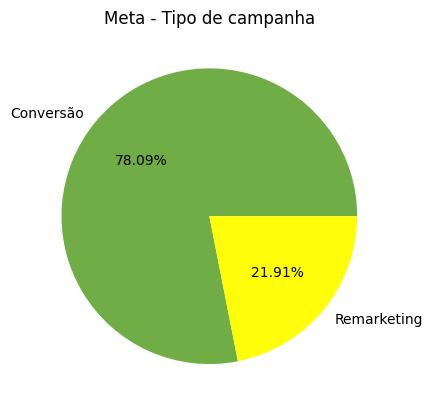

In [ ]:
colors=["#70AD46", "#FFFD09"]
plt.pie(freq_tipo_campanha['%'], labels = freq_tipo_campanha['Tipo de Campanha'], autopct='%.2f%%', colors=colors)
plt.title("Meta - Tipo de campanha")
plt.show()

In [ ]:
freq_abs = pd.DataFrame(meta['Produto/Anúncio'].value_counts())
freq_rel = pd.DataFrame(meta['Produto/Anúncio'].value_counts(1)*100)
freq_produto_anuncio = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_produto_anuncio.columns = ['Produto/Anúncio', 'Qtde', '%']
freq_produto_anuncio.round({'%': 2})


,Produto/Anúncio,Qtde,%
0,Empréstimo,909,75.44
1,Conta Corrente Digital,296,24.56


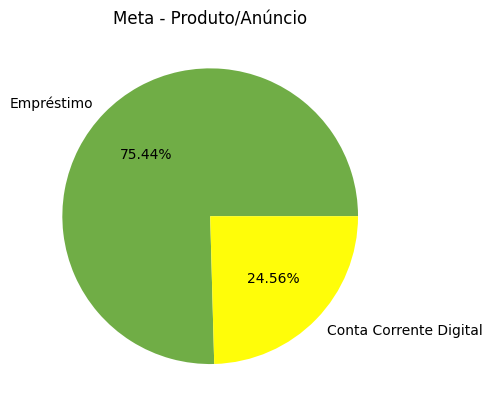

In [ ]:
plt.pie(freq_produto_anuncio['%'], labels = freq_produto_anuncio['Produto/Anúncio'], autopct='%.2f%%', colors=colors)
plt.title("Meta - Produto/Anúncio")
plt.show()

In [ ]:
freq_abs = pd.DataFrame(meta['Público'].value_counts())
freq_rel = pd.DataFrame(meta['Público'].value_counts(1)*100)
freq_publico = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_publico.columns = ['Público', 'Qtde', '%']
freq_publico.round({'%': 2})


,Público,Qtde,%
0,Cold,941,78.09
1,Hot,264,21.91


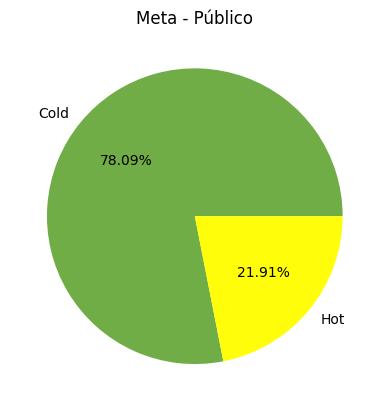

In [ ]:
plt.pie(freq_publico['%'], labels = freq_publico['Público'], autopct='%.2f%%', colors=colors)
plt.title("Meta - Público")
plt.show()

In [ ]:
meta['mês do lead'] = meta['Dia'].dt.to_period('M')

In [ ]:
freq_abs = pd.DataFrame(meta.groupby('mês do lead')['Impressões do anúncio'].sum())
freq_rel = pd.DataFrame(meta.groupby('mês do lead')['Impressões do anúncio'].sum()/meta['Impressões do anúncio'].sum()*100)
freq_impressoes = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_impressoes.columns = ['mês do lead', 'Impressões do anúncio', '% Impressões do anúncio']
freq_impressoes = freq_impressoes.round({'% Impressões do anúncio': 2})


In [ ]:
freq_abs = pd.DataFrame(meta.groupby('mês do lead')['Cliques'].sum())
freq_rel = pd.DataFrame(meta.groupby('mês do lead')['Cliques'].sum()/meta['Cliques'].sum()*100)
freq_cliques = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_cliques.columns = ['mês do lead', 'Cliques', '% cliques']
freq_cliques = freq_cliques.round({'% cliques': 2})

In [ ]:
freq_abs = pd.DataFrame(meta.groupby('mês do lead')['Conversões'].sum())
freq_rel = pd.DataFrame(meta.groupby('mês do lead')['Conversões'].sum()/meta['Conversões'].sum()*100)
freq_conversoes = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conversoes.columns = ['mês do lead', 'Conversões', '% conversões']
freq_conversoes = freq_conversoes.round({'% conversões': 2})

In [ ]:
anuncios_meta = freq_impressoes.merge(freq_cliques.merge(freq_conversoes, how='left'), how='left')
anuncios_meta['cliques/impressões'] = (anuncios_meta['Cliques']/anuncios_meta['Impressões do anúncio']*100).round(2)
anuncios_meta['conversões/cliques'] = (anuncios_meta['Conversões']/anuncios_meta['Cliques']*100).round(2)
anuncios_meta

,mês do lead,Impressões do anúncio,% Impressões do anúncio,Cliques,% cliques,Conversões,% conversões,cliques/impressões,conversões/cliques
0,2022-09,4433470,8.71,26460,8.57,24,11.54,0.60,0.09
1,2022-10,9796530,19.25,53078,17.19,23,11.06,0.54,0.04
2,2022-11,11307700,22.22,72800,23.58,91,43.75,0.64,0.12
3,2022-12,10041820,19.73,56010,18.14,14,6.73,0.56,0.02
4,2023-01,8159100,16.03,47300,15.32,25,12.02,0.58,0.05
5,2023-02,7151930,14.05,53090,17.20,31,14.90,0.74,0.06


In [ ]:
anuncios_plot = anuncios_meta[['mês do lead','% Impressões do anúncio', '% cliques','% conversões']]
anuncios_plot = anuncios_plot.melt(id_vars='mês do lead', 
        var_name="Indicador", 
        value_name="%")


In [ ]:
anuncios_plot2 = anuncios_meta[['mês do lead','Impressões do anúncio', 'Cliques','Conversões']]
anuncios_plot2 = anuncios_plot2.melt(id_vars='mês do lead', 
        var_name="Indicador", 
        value_name="R$")



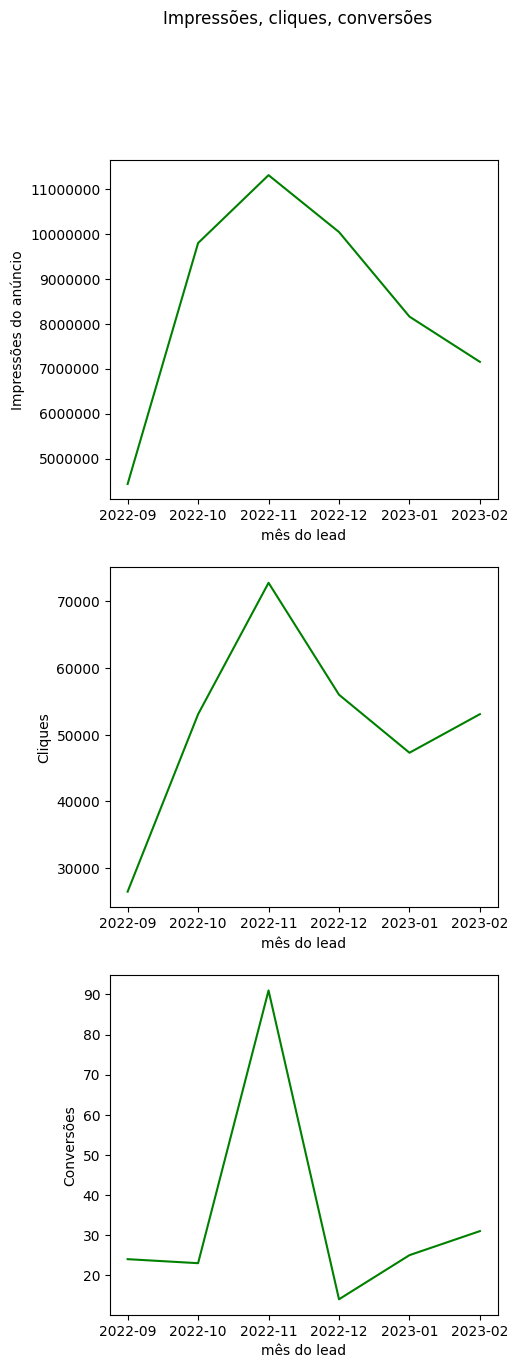

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 15))
fig.suptitle('Impressões, cliques, conversões')
sns.lineplot(ax = ax1, data=anuncios_meta, x=anuncios_meta['mês do lead'].astype(str), y='Impressões do anúncio', color='green');
ax1.ticklabel_format(style='plain', axis='y')
sns.lineplot(ax = ax2, data=anuncios_meta, x=anuncios_meta['mês do lead'].astype(str), y='Cliques', color='green');
sns.lineplot(ax = ax3, data=anuncios_meta, x=anuncios_meta['mês do lead'].astype(str), y='Conversões', color='green');
plt.ticklabel_format(style='plain', axis='y')




<ipython-input-74-6f1a392697e0>:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=anuncios_plot, x=anuncios_plot['mês do lead'].astype(str), y='%', hue='Indicador', palette=colors);


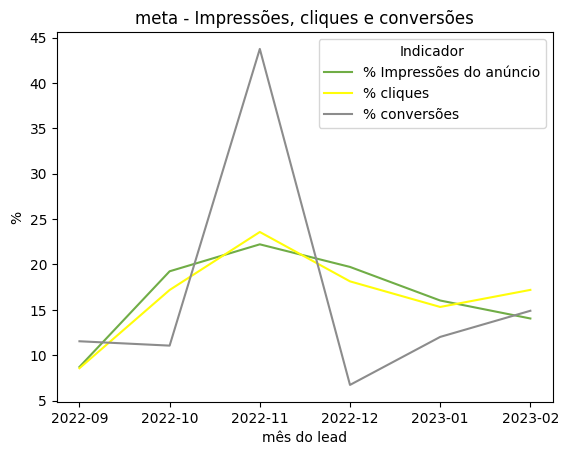

In [ ]:
colors=["#70AD46", "#FFFD09", "#8C8C8C", "#F2E205"]
sns.lineplot(data=anuncios_plot, x=anuncios_plot['mês do lead'].astype(str), y='%', hue='Indicador', palette=colors);
plt.ticklabel_format(style='plain', axis='y')
plt.title("meta - Impressões, cliques e conversões");
plt.show();

<ipython-input-75-aeaeeb481dcc>:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=anuncios_plot2, x=anuncios_plot2['mês do lead'].astype(str), y='R$', hue='Indicador', palette=colors);


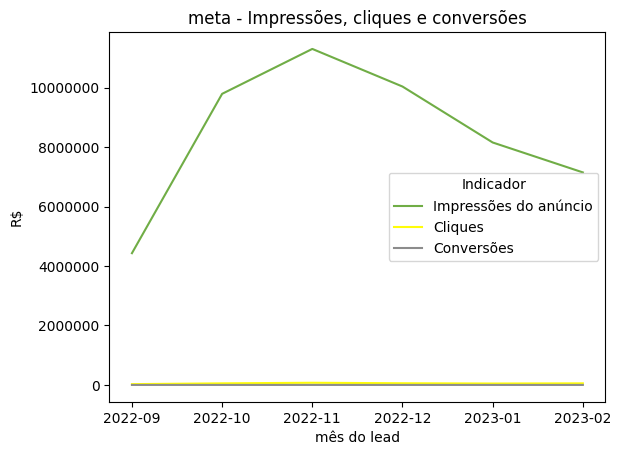

In [ ]:
sns.lineplot(data=anuncios_plot2, x=anuncios_plot2['mês do lead'].astype(str), y='R$', hue='Indicador', palette=colors);
plt.title("meta - Impressões, cliques e conversões");
plt.ticklabel_format(style='plain', axis='y')
plt.show();

In [ ]:
freq_abs = pd.DataFrame(meta.groupby('mês do lead')['Custo'].sum())
freq_rel = pd.DataFrame(meta.groupby('mês do lead')['Custo'].sum()/meta['Custo'].sum()*100)
freq_custos = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_custos.columns = ['mês do lead', 'Custo', '% Custo']
freq_custos = freq_custos.round({'% Custo': 2})


In [ ]:
freq_abs = pd.DataFrame(meta.groupby('mês do lead')['Receita'].sum())
freq_rel = pd.DataFrame(meta.groupby('mês do lead')['Receita'].sum()/meta['Receita'].sum()*100)
freq_receita = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_receita.columns = ['mês do lead', 'Receita', '% Receita']
freq_receita = freq_receita.round({'% Receita': 2})


In [ ]:
receita_custo = freq_receita.merge(freq_custos, how='left')
receita_custo['custo/receita'] = (receita_custo['Custo']/receita_custo['Receita']*100).round(2)
receita_custo

,mês do lead,Receita,% Receita,Custo,% Custo,custo/receita
0,2022-09,304099.20,7.99,106171.0,9.62,34.91
1,2022-10,358974.00,9.43,192543.5,17.45,53.64
2,2022-11,1654284.30,43.48,264467.3,23.97,15.99
3,2022-12,276955.65,7.28,189053.9,17.14,68.26
4,2023-01,505425.00,13.28,172831.8,15.67,34.20
5,2023-02,705072.00,18.53,178062.7,16.14,25.25


In [ ]:
receita_plot = receita_custo[['mês do lead','Receita', 'Custo']]
receita_plot = receita_plot.melt(id_vars='mês do lead', 
        var_name="Indicador", 
        value_name="R$")


<ipython-input-80-bcf0397418e3>:1: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.lineplot(data=receita_plot, x=receita_plot['mês do lead'].astype(str), y='R$', hue='Indicador', palette=colors);


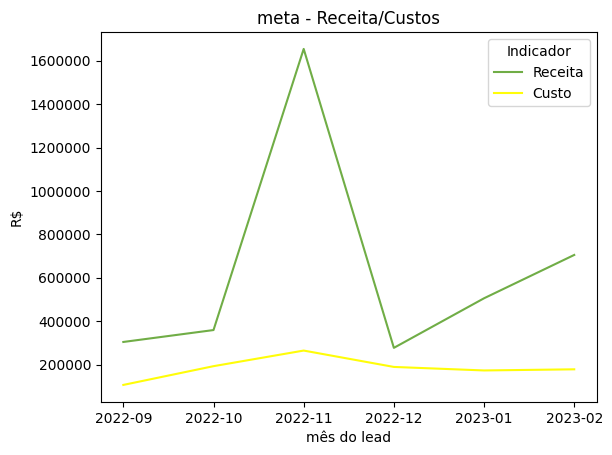

In [ ]:
sns.lineplot(data=receita_plot, x=receita_plot['mês do lead'].astype(str), y='R$', hue='Indicador', palette=colors);
plt.title("meta - Receita/Custos");
plt.ticklabel_format(style='plain', axis='y')
plt.show();

## Análise bivariada


In [ ]:
campanha_impressoes = meta['Impressões do anúncio'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_impressoes.columns = ['Tipo de Campanha','Impressões do anúncio']
campanha_impressoes_perc = (meta['Impressões do anúncio'].groupby(meta['Tipo de Campanha']).sum()/meta['Impressões do anúncio'].sum()*100).reset_index().round(2)
campanha_impressoes_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_impressao = pd.merge(campanha_impressoes, campanha_impressoes_perc, on = 'Tipo de Campanha')
freq_campanha_impressao

,Tipo de Campanha,Impressões do anúncio,%
0,Conversão,44303090,87.06
1,Remarketing,6587460,12.94


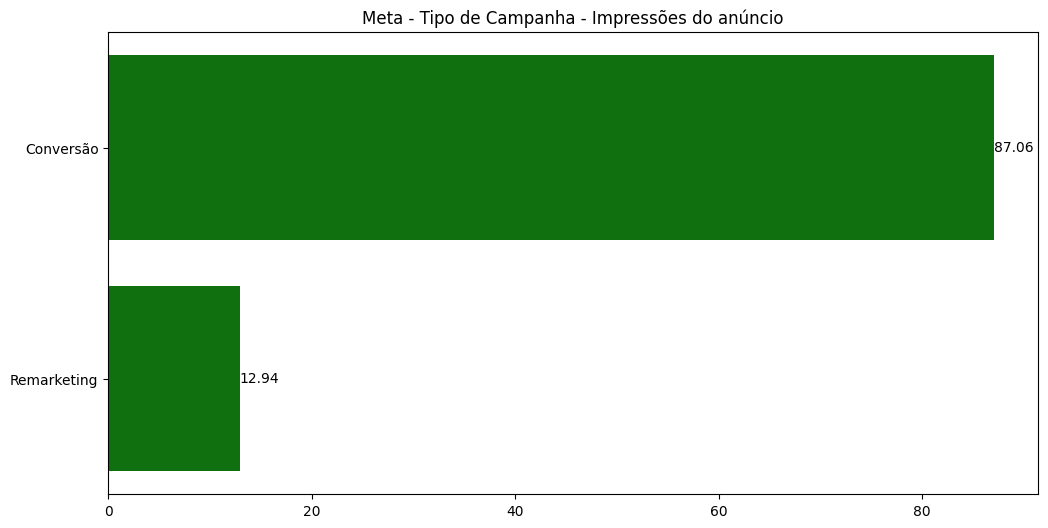

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_impressao, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - Impressões do anúncio')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_cliques = meta['Cliques'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_cliques.columns = ['Tipo de Campanha','Cliques']
campanha_cliques_perc = (meta['Cliques'].groupby(meta['Tipo de Campanha']).sum()/meta['Cliques'].sum()*100).reset_index().round(2)
campanha_cliques_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_cliques = pd.merge(campanha_cliques, campanha_cliques_perc, on = 'Tipo de Campanha')
freq_campanha_cliques

,Tipo de Campanha,Cliques,%
0,Conversão,273863,88.7
1,Remarketing,34875,11.3


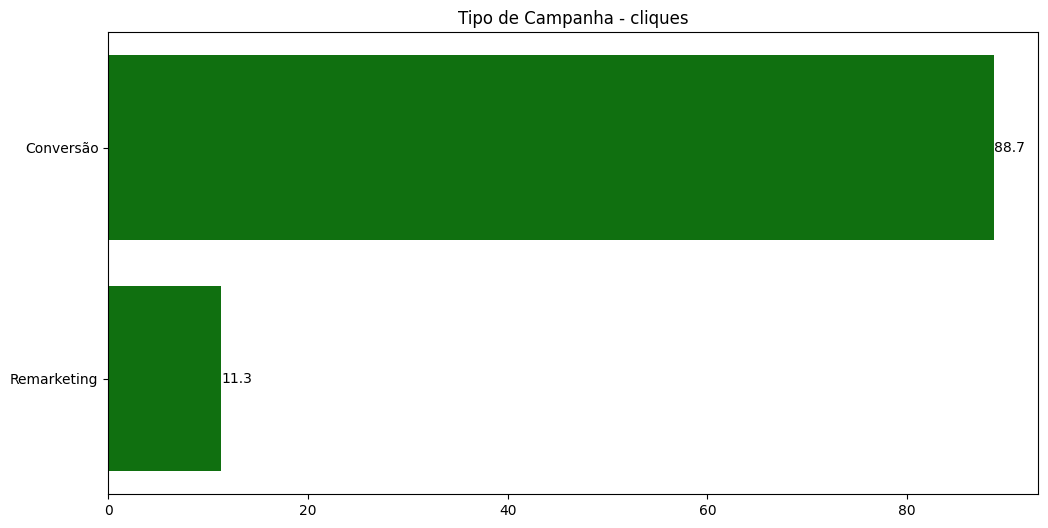

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_cliques, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Tipo de Campanha - cliques')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_custo = meta['Custo'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_custo.columns = ['Tipo de Campanha','Custo']
campanha_custo_perc = (meta['Custo'].groupby(meta['Tipo de Campanha']).sum()/meta['Custo'].sum()*100).reset_index().round(2)
campanha_custo_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_custo = pd.merge(campanha_custo, campanha_custo_perc, on = 'Tipo de Campanha')
freq_campanha_custo

,Tipo de Campanha,Custo,%
0,Conversão,849518.6,77.01
1,Remarketing,253611.6,22.99


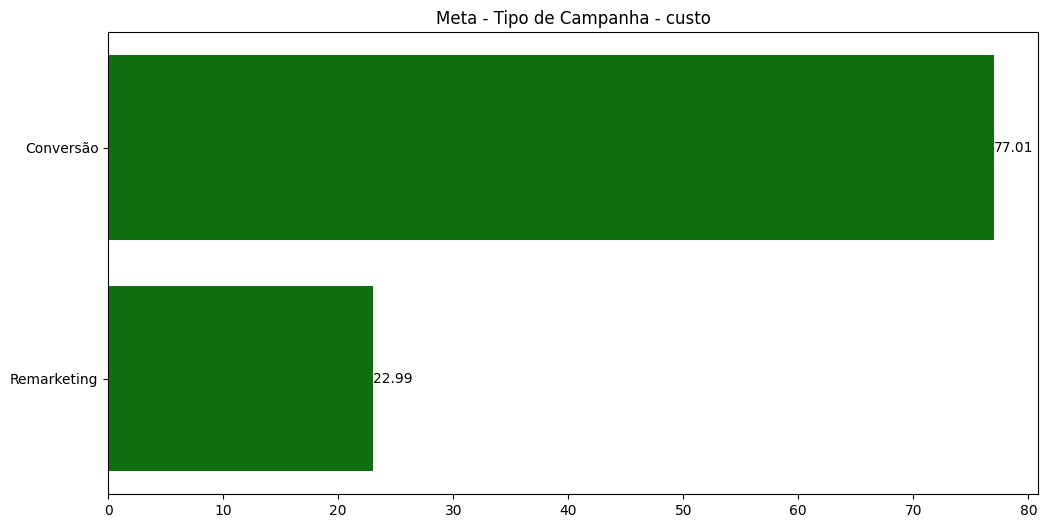

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_custo, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - custo')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_cc = meta['Cadastros de Conta Corrente'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_cc.columns = ['Tipo de Campanha','Cadastros de Conta Corrente']
campanha_cc_perc = (meta['Cadastros de Conta Corrente'].groupby(meta['Tipo de Campanha']).sum()/meta['Cadastros de Conta Corrente'].sum()*100).reset_index().round(2)
campanha_cc_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_cc = pd.merge(campanha_cc, campanha_cc_perc, on = 'Tipo de Campanha')
freq_campanha_cc

,Tipo de Campanha,Cadastros de Conta Corrente,%
0,Conversão,4424,100.0
1,Remarketing,0,0.0


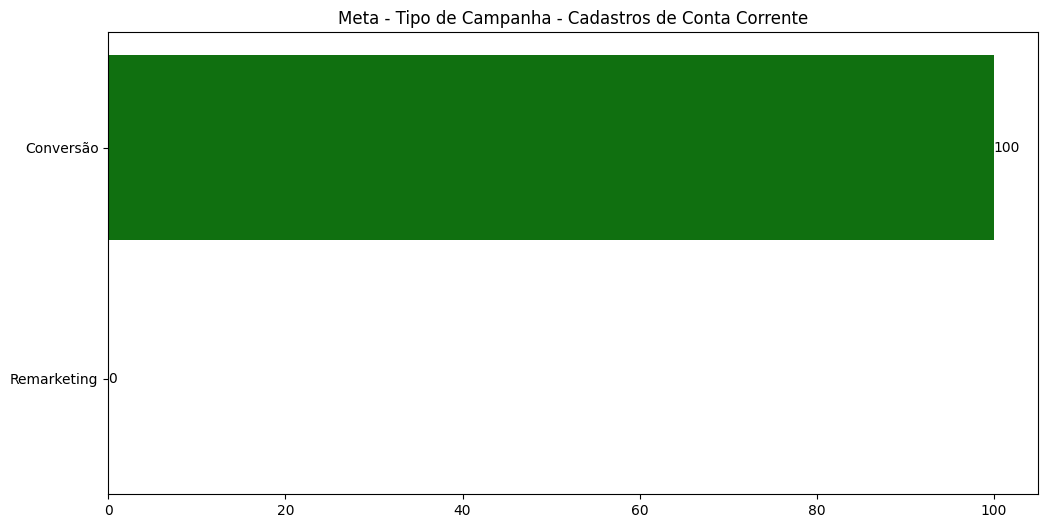

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_cc, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - Cadastros de Conta Corrente')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_conversoes = meta['Conversões'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_conversoes.columns = ['Tipo de Campanha','Conversões']
campanha_conversoes_perc = (meta['Conversões'].groupby(meta['Tipo de Campanha']).sum()/meta['Conversões'].sum()*100).reset_index().round(2)
campanha_conversoes_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_conversoes = pd.merge(campanha_conversoes, campanha_conversoes_perc, on = 'Tipo de Campanha')
freq_campanha_conversoes

,Tipo de Campanha,Conversões,%
0,Conversão,131,62.98
1,Remarketing,77,37.02


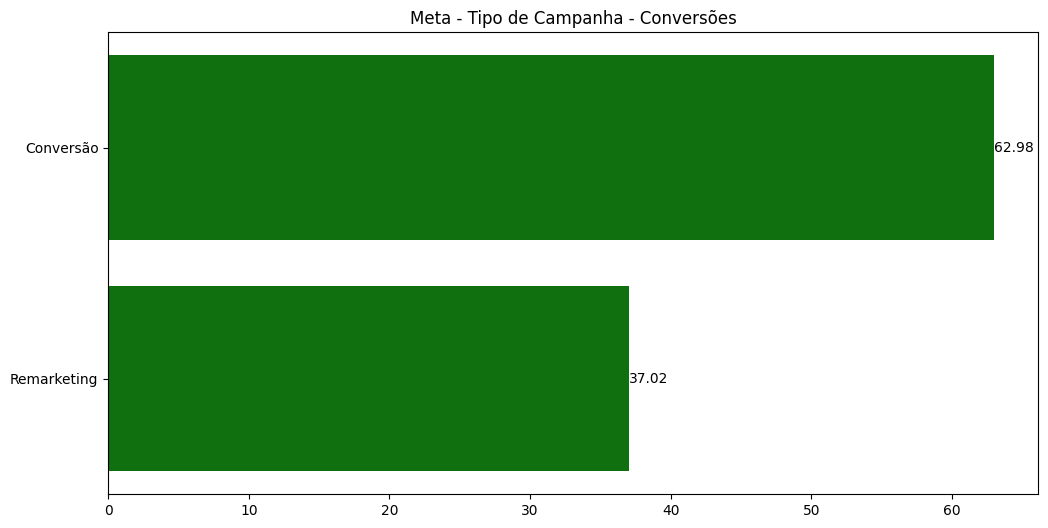

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_conversoes, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - Conversões')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
campanha_receita = meta['Receita'].groupby(meta['Tipo de Campanha']).sum().reset_index()
campanha_receita.columns = ['Tipo de Campanha','Receita']
campanha_receita_perc = (meta['Receita'].groupby(meta['Tipo de Campanha']).sum()/meta['Receita'].sum()*100).reset_index().round(2)
campanha_receita_perc.columns = ['Tipo de Campanha', '%']
freq_campanha_receita = pd.merge(campanha_receita, campanha_receita_perc, on = 'Tipo de Campanha')
freq_campanha_receita

,Tipo de Campanha,Receita,%
0,Conversão,2476550.70,65.09
1,Remarketing,1328259.45,34.91


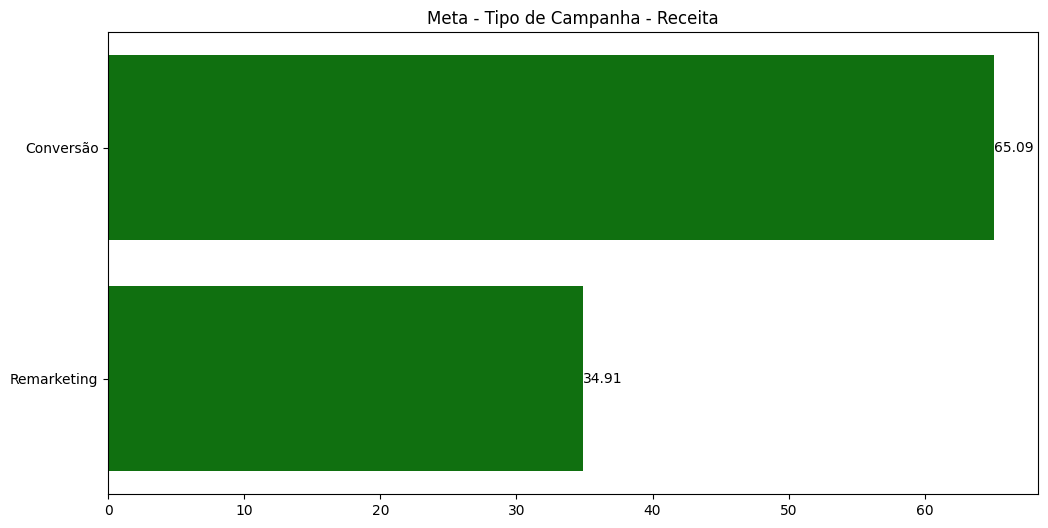

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_campanha_receita, x= "%", y= 'Tipo de Campanha', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Tipo de Campanha - Receita')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

## Produto/Anúncio

In [ ]:
produto_impressoes = meta['Impressões do anúncio'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_impressoes.columns = ['Produto/Anúncio','Impressões do anúncio']
produto_impressoes_perc = (meta['Impressões do anúncio'].groupby(meta['Produto/Anúncio']).sum()/meta['Impressões do anúncio'].sum()*100).reset_index().round(2)
produto_impressoes_perc.columns = ['Produto/Anúncio', '%']
freq_produto_impressao = pd.merge(produto_impressoes, produto_impressoes_perc, on = 'Produto/Anúncio')
freq_produto_impressao

,Produto/Anúncio,Impressões do anúncio,%
0,Conta Corrente Digital,13909810,27.33
1,Empréstimo,36980740,72.67


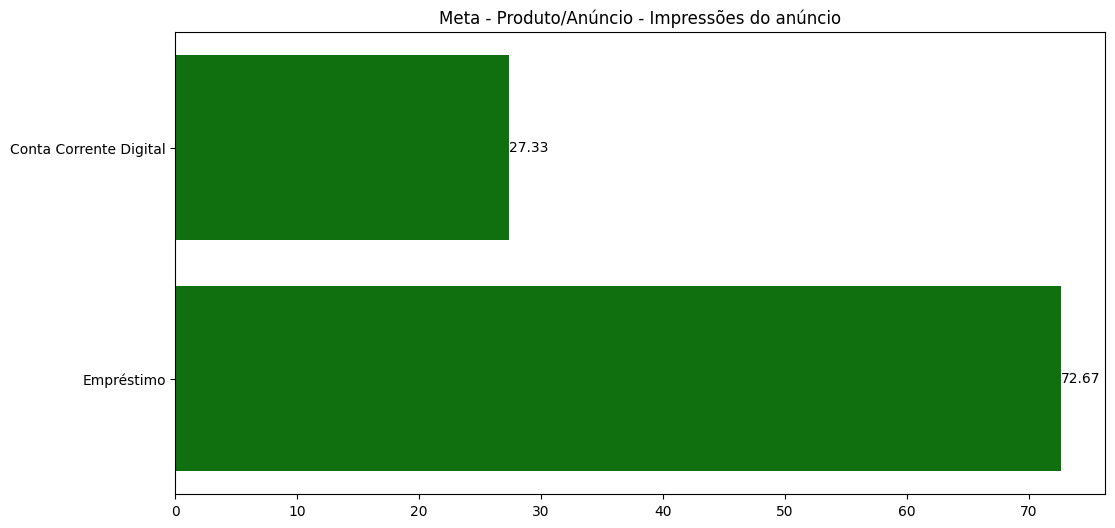

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_impressao, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - Impressões do anúncio')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_cliques = meta['Cliques'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_cliques.columns = ['Produto/Anúncio','Cliques']
produto_cliques_perc = (meta['Cliques'].groupby(meta['Produto/Anúncio']).sum()/meta['Cliques'].sum()*100).reset_index().round(2)
produto_cliques_perc.columns = ['Produto/Anúncio', '%']
freq_produto_cliques = pd.merge(produto_cliques, produto_cliques_perc, on = 'Produto/Anúncio')
freq_produto_cliques

,Produto/Anúncio,Cliques,%
0,Conta Corrente Digital,131520,42.6
1,Empréstimo,177218,57.4


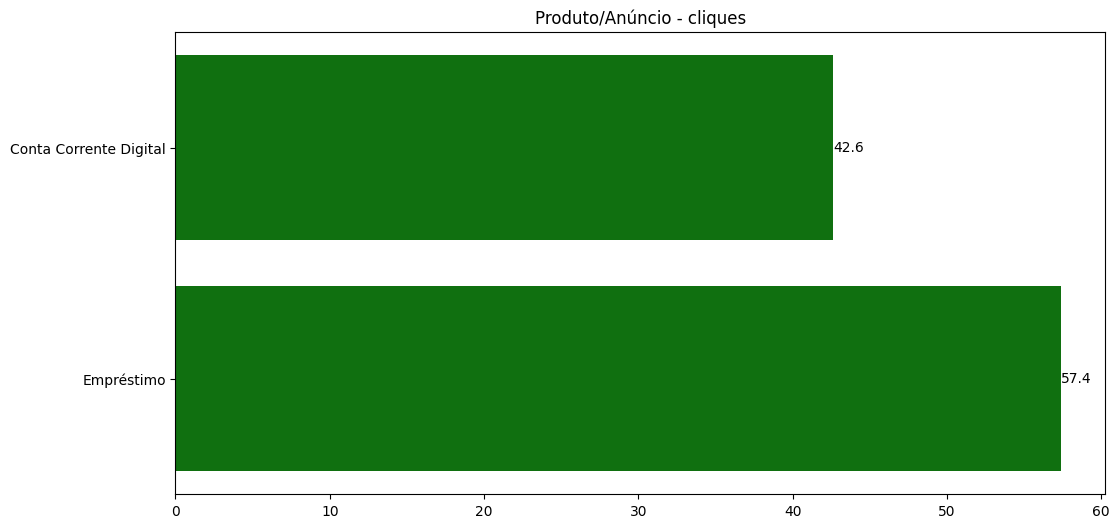

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_cliques, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Produto/Anúncio - cliques')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_custo = meta['Custo'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_custo.columns = ['Produto/Anúncio','Custo']
produto_custo_perc = (meta['Custo'].groupby(meta['Produto/Anúncio']).sum()/meta['Custo'].sum()*100).reset_index().round(2)
produto_custo_perc.columns = ['Produto/Anúncio', '%']
freq_produto_custo = pd.merge(produto_custo, produto_custo_perc, on = 'Produto/Anúncio')
freq_produto_custo

,Produto/Anúncio,Custo,%
0,Conta Corrente Digital,135691.1,12.3
1,Empréstimo,967439.1,87.7


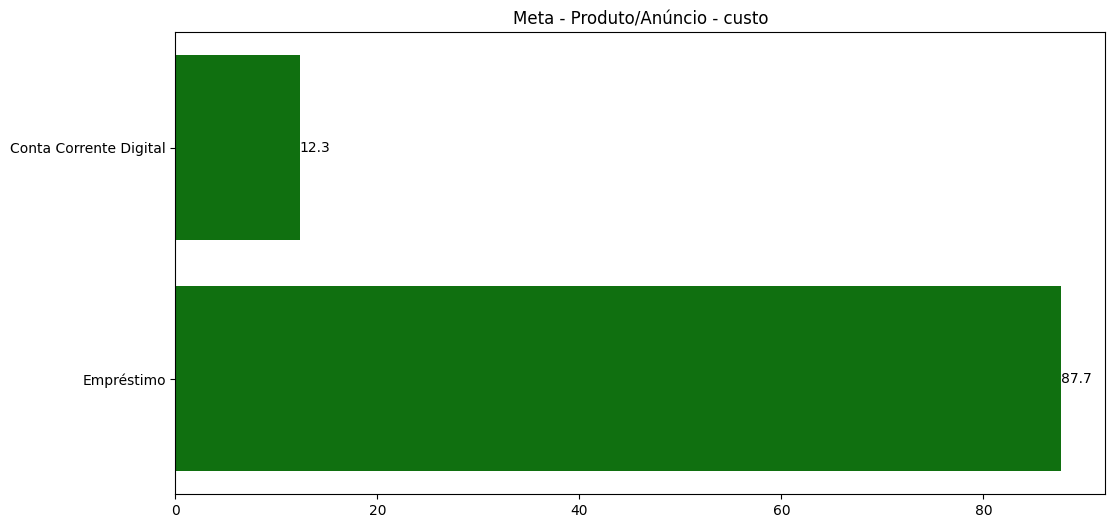

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_custo, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - custo')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_cc = meta['Cadastros de Conta Corrente'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_cc.columns = ['Produto/Anúncio','Cadastros de Conta Corrente']
produto_cc_perc = (meta['Cadastros de Conta Corrente'].groupby(meta['Produto/Anúncio']).sum()/meta['Cadastros de Conta Corrente'].sum()*100).reset_index().round(2)
produto_cc_perc.columns = ['Produto/Anúncio', '%']
freq_produto_cc = pd.merge(produto_cc, produto_cc_perc, on = 'Produto/Anúncio')
freq_produto_cc

,Produto/Anúncio,Cadastros de Conta Corrente,%
0,Conta Corrente Digital,4424,100.0
1,Empréstimo,0,0.0


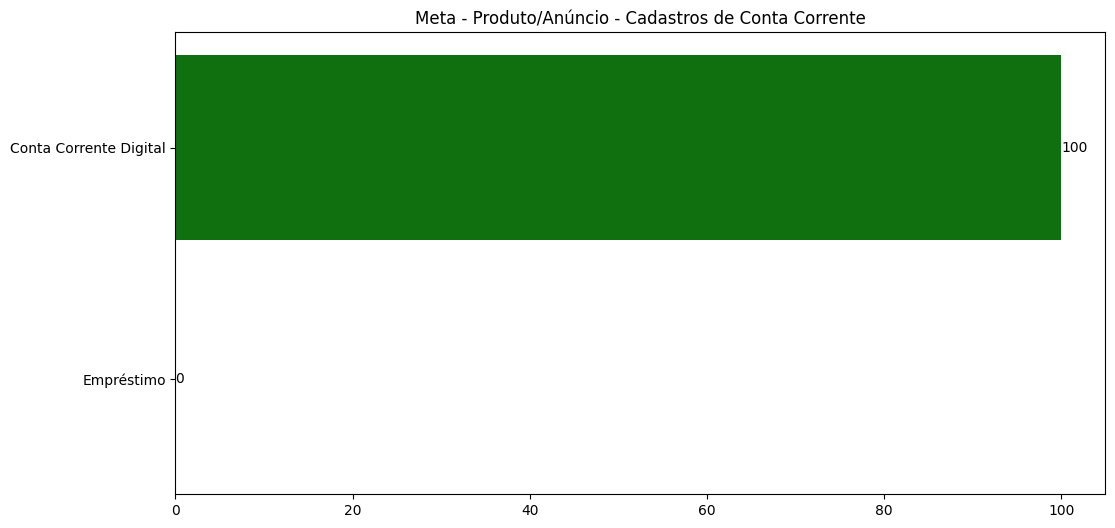

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_cc, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - Cadastros de Conta Corrente')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_conversoes = meta['Conversões'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_conversoes.columns = ['Produto/Anúncio','Conversões']
produto_conversoes_perc = (meta['Conversões'].groupby(meta['Produto/Anúncio']).sum()/meta['Conversões'].sum()*100).reset_index().round(2)
produto_conversoes_perc.columns = ['Produto/Anúncio', '%']
freq_produto_conversoes = pd.merge(produto_conversoes, produto_conversoes_perc, on = 'Produto/Anúncio')
freq_produto_conversoes

,Produto/Anúncio,Conversões,%
0,Conta Corrente Digital,0,0.0
1,Empréstimo,208,100.0


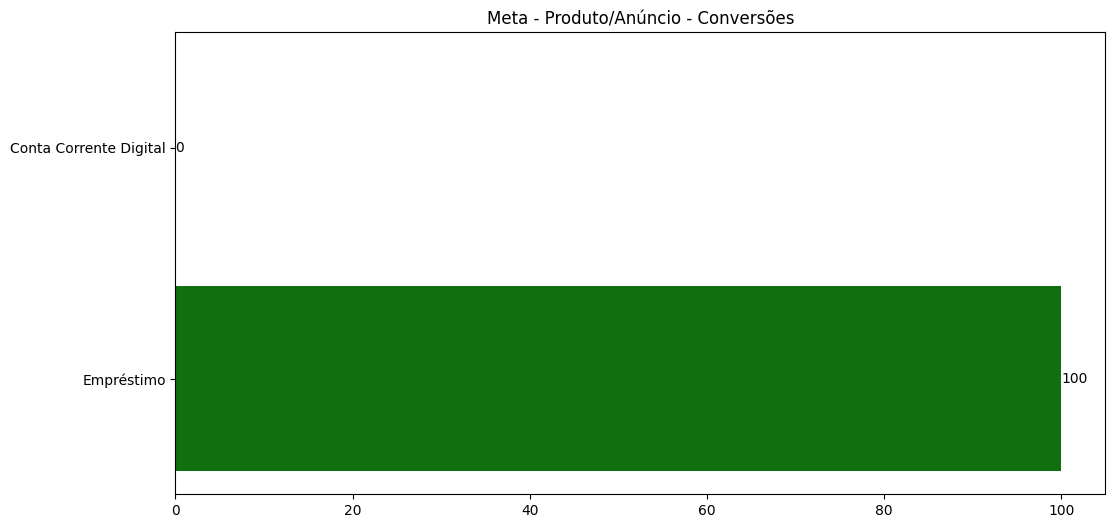

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_conversoes, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - Conversões')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
produto_receita = meta['Receita'].groupby(meta['Produto/Anúncio']).sum().reset_index()
produto_receita.columns = ['Produto/Anúncio','Receita']
produto_receita_perc = (meta['Receita'].groupby(meta['Produto/Anúncio']).sum()/meta['Receita'].sum()*100).reset_index().round(2)
produto_receita_perc.columns = ['Produto/Anúncio', '%']
freq_produto_receita = pd.merge(produto_receita, produto_receita_perc, on = 'Produto/Anúncio')
freq_produto_receita

,Produto/Anúncio,Receita,%
0,Conta Corrente Digital,0.00,0.0
1,Empréstimo,3804810.15,100.0


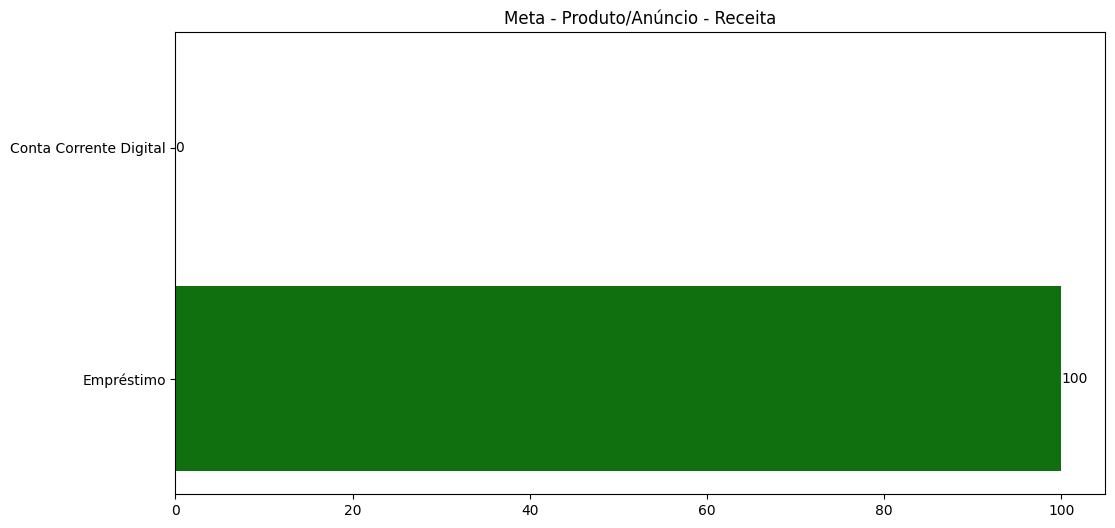

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=freq_produto_receita, x= "%", y= 'Produto/Anúncio', palette= ['green'])
ax.bar_label(ax.containers[0])
plt.title('Meta - Produto/Anúncio - Receita')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
meta.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_metaads_tratada.xlsx", index = False)

In [ ]:
meta

,Dia,Tipo de Campanha,Produto/Anúncio,Público,Impressões do anúncio,Cliques,Custo,Cadastros de Conta Corrente,Conversões,Receita,mês do lead
0,2022-09-01,Conversão,Empréstimo,Cold,70490,430,1463.0,0,0,0.0,2022-09
1,2022-09-01,Remarketing,Empréstimo,Hot,49050,270,976.1,0,0,0.0,2022-09
2,2022-09-01,Remarketing,Empréstimo,Hot,6010,20,296.1,0,0,0.0,2022-09
3,2022-09-02,Conversão,Empréstimo,Cold,61850,370,1457.2,0,0,0.0,2022-09
4,2022-09-02,Remarketing,Empréstimo,Hot,47060,280,968.4,0,1,13459.5,2022-09
...,...,...,...,...,...,...,...,...,...,...,...
1200,2023-02-28,Conversão,Empréstimo,Cold,22440,190,858.9,0,2,37260.0,2023-02
1201,2023-02-28,Conversão,Empréstimo,Cold,12780,70,600.0,0,2,56910.0,2023-02
1202,2023-02-28,Conversão,Empréstimo,Cold,34340,140,904.8,0,0,0.0,2023-02
1203,2023-02-28,Conversão,Empréstimo,Cold,55570,370,2014.5,0,2,44910.0,2023-02
